In [1]:
import networkx as nx
from enum import Enum
import math

In [2]:
class NODE_TYPES(Enum):
    Mountains = 1
    Hills = 2
    Forest = 3
    Fields = 4
    Pasture = 5
    Desert = 6

class PORTS(Enum):
    Any = 1
    Grain = 2
    Ore = 3
    Wool = 4
    Brick = 5
    Lumber = 6

class ROBBERS(Enum):
    Normal = 1
    See = 3

class ROADS(Enum):
    Missing = 1
    Placed = 2
    Boat = 3

class BUILDINGS(Enum):
    Missing = 1
    Settelment = 2
    City = 3

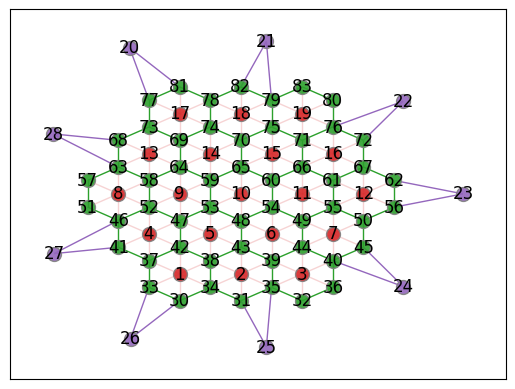

In [5]:
G = nx.Graph()

G.add_nodes_from([
    # Tiles
    (1, {"type": "tile", "node_type": NODE_TYPES.Mountains, "dice_value": 10}),
    (2, {"type": "tile", "node_type": NODE_TYPES.Pasture, "dice_value": 2}),
    (3, {"type": "tile", "node_type": NODE_TYPES.Forest, "dice_value": 9}),
    (4, {"type": "tile", "node_type": NODE_TYPES.Fields, "dice_value": 12}),
    (5, {"type": "tile", "node_type": NODE_TYPES.Hills, "dice_value": 6}),
    (6, {"type": "tile", "node_type": NODE_TYPES.Fields, "dice_value": 4}),
    (7, {"type": "tile", "node_type": NODE_TYPES.Hills, "dice_value": 10}),
    (8, {"type": "tile", "node_type": NODE_TYPES.Fields, "dice_value": 8}),
    (9, {"type": "tile", "node_type": NODE_TYPES.Forest, "dice_value": 11}),
    (10, {"type": "tile", "node_type": NODE_TYPES.Desert, "dice_value": 0}),
    (11, {"type": "tile", "node_type": NODE_TYPES.Forest, "dice_value": 3}),
    (12, {"type": "tile", "node_type": NODE_TYPES.Mountains, "dice_value": 8}),
    (13, {"type": "tile", "node_type": NODE_TYPES.Forest, "dice_value": 8}),
    (14, {"type": "tile", "node_type": NODE_TYPES.Mountains, "dice_value": 3}),
    (15, {"type": "tile", "node_type": NODE_TYPES.Fields, "dice_value": 4}),
    (16, {"type": "tile", "node_type": NODE_TYPES.Pasture, "dice_value": 5}),
    (17, {"type": "tile", "node_type": NODE_TYPES.Hills, "dice_value": 5}),
    (18, {"type": "tile", "node_type": NODE_TYPES.Fields, "dice_value": 6}),
    (19, {"type": "tile", "node_type": NODE_TYPES.Pasture, "dice_value": 11}),

    # Ports
    (20, {"type": "port", "port_type": PORTS.Any}),
    (21, {"type": "port", "port_type": PORTS.Grain}),
    (22, {"type": "port", "port_type": PORTS.Ore}),
    (23, {"type": "port", "port_type": PORTS.Any}),
    (24, {"type": "port", "port_type": PORTS.Wool}),
    (25, {"type": "port", "port_type": PORTS.Any}),
    (26, {"type": "port", "port_type": PORTS.Any}),
    (27, {"type": "port", "port_type": PORTS.Brick}),
    (28, {"type": "port", "port_type": PORTS.Lumber}),

    # Robber
    (29, {"type": "robber", "rober_type": ROBBERS.Normal}),
])

n_rows = [3, 4, 5, 4, 3]
factor = 1
cnt_tile = 1
centers = []

step_x = 10
step_y = 2.88675134595 

fixed_positions = {}
buildings = set()


tile_building = {}

for idx, n_row in enumerate(n_rows):
    first_shift = (max(n_rows) - n_row) * (step_x*0.5)

    for tile in range(n_row):

        y = step_y + (3 * step_y * idx)
        x = (tile * step_x) + first_shift 
        
        fixed_positions[cnt_tile] =(x, y)
        cnt_tile += 1


        buildings.add((x,                      round(y-(2*step_y), 4)))
        buildings.add((round(x+step_x*0.5, 4), round(y-(1*step_y), 4)))
        buildings.add((round(x+step_x*0.5, 4), round(y+(1*step_y), 4)))
        buildings.add((x,                      round(y+(2*step_y), 4)))
        buildings.add((round(x-step_x*0.5, 4), round(y+(1*step_y), 4)))
        buildings.add((round(x-step_x*0.5, 4), round(y-(1*step_y), 4)))


buildings = list(buildings)
buildings.sort(key=lambda x: (x[1], x[0]))  
cnt_buildings = 30
for x in buildings:
    G.add_nodes_from([(cnt_buildings, {'type': 'building', 'bulding_type': BUILDINGS.Missing})])
    fixed_positions[cnt_buildings] = x
    cnt_buildings +=1 



tile_building = {
    1 :[ 0,3,4,7,8,12],
    2 :[ 13, 9,8,4,5,1],
    3 :[ 14,9,10,5,6,2],

    4 :[22,16,17,11,12,7],
    5 :[23,17,18,12,13,8],
    6 :[24,18,19,13,14,9],
    7 :[25,19,20,14,15,10],

   8: [33,27,28,21,16,22],
   9: [34,28,22,17,23,29],
   10: [35,29,30,23,24,18],
   11: [36,30,31,24,25,19],
   12: [37,31,32,25,26,20],
   
   13: [43,38,33,28,39,34],
   14: [44,39,40,34,35,29],
   15: [45,40,41,35,36,30],
   16: [46,41,42,36,37,31],

   17: [51,47,48,43,44,39],
   18: [52,48,49,44,45,40],
   19: [53,49,50,45,46,41],
}


for tile in tile_building:
    for building in tile_building[tile]:
        G.add_edge(
            tile,
            building + 30,
            label = {"type": "produce_to"}
        )


index_streets = [(0,1),(0,2),(1,3),(2,4),(5,3),(5,4)]
for _, roads in tile_building.items():
    roads.sort()

    for a, b in index_streets:
        x = roads[a]
        y = roads[b]
        G.add_edge(
            x+30,
            y + 30,
            label = {"type": "street", "street_type": ROADS.Missing}
        )






















ports = {
    20: [77, 81],
    21: [82, 79],
    22: [76, 72],
    23: [62,56],
    24: [40,45],
    25: [31,35],
    26: [33,30],
    27: [46,41],
    28: [68, 63],
}

for port in ports:
    for building in ports[port]:
        G.add_edge(
            port,
            building,
            label = {"type": "trades"}
        )

fixed_nodes = fixed_positions.keys()
pos = nx.spring_layout(G,pos=fixed_positions, fixed = fixed_nodes)




options = {"edgecolors": "tab:gray", "node_size": 100, "alpha": 0.9}
nx.draw_networkx_nodes(G, pos, nodelist=[x for x,y in G.nodes(data=True) if y["type"] == "tile"], node_color="tab:red", **options)
nx.draw_networkx_nodes(G, pos, nodelist=[x for x,y in G.nodes(data=True) if y["type"] == "building"], node_color="tab:green", **options)
nx.draw_networkx_nodes(G, pos, nodelist=[x for x,y in G.nodes(data=True) if y["type"] == "port"], node_color="tab:purple", **options)



nx.draw_networkx_labels(G, pos, labels={x:x for x in G.nodes()})


nx.draw_networkx_edges(G, pos, edgelist=[(a,b) for a,b, y in G.edges(data=True) if y["label"]["type"] == "produce_to"], edge_color="tab:red", alpha=0.2)
nx.draw_networkx_edges(G, pos, edgelist=[(a,b) for a,b, y in G.edges(data=True) if y["label"]["type"] == "street"], edge_color="tab:green")
nx.draw_networkx_edges(G, pos, edgelist=[(a,b) for a,b, y in G.edges(data=True) if y["label"]["type"] == "trades"], edge_color="tab:purple")

